<a href="https://colab.research.google.com/github/csrajath/AlumniWebApp/blob/master/Random_Forest__DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""import necessary libraries
sklearn - digits dataseet, test train, random forest
display first five items in the dataset
create a dataframe of digits
add the target values to each row in the data frame
train and test the data
execute randome forest model
calculate the score
calculate the score using more number of trees
plot a confusion matrix for the same
"""

'import necessary libraries\nimport digits datasets\ndisplay first five items in the dataset\ncreate a dataframe of digits\n'

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
digits = load_digits()

<Figure size 432x288 with 0 Axes>

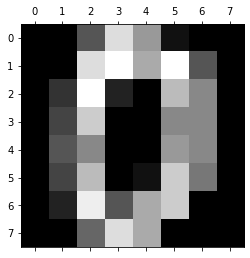

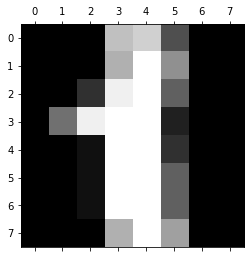

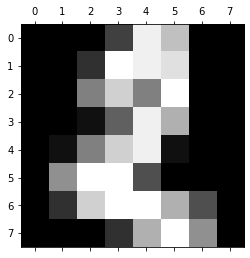

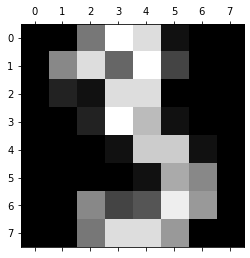

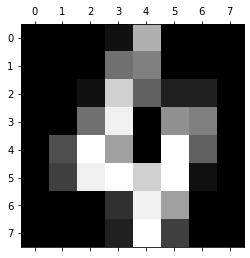

In [11]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [15]:
df = pd.DataFrame(digits.data)
df['Target'] = digits.target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis='columns'), df.Target,test_size=0.2)

In [20]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
model.score(X_test, y_test)

0.9805555555555555

In [28]:
predict = model.predict(X_test)

In [32]:
cf = confusion_matrix(y_test, predict)
cf

array([[26,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 41,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 42]])

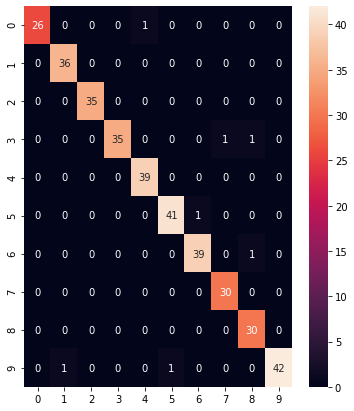

In [34]:
plt.figure(figsize=(6,7))
plt.xlabel('Predict')
plt.ylabel('Truth')
sns.heatmap(cf, annot=True)
